# Generating Plots

In [2]:
# read the HAM10000 dataset and output 1 from each class
img_folder = "/home/sn666/explainable_ai/LaBo/datasets/HAM10000/images"

['ISIC_0031655.jpg', 'ISIC_0032571.jpg', 'ISIC_0030971.jpg', 'ISIC_0029146.jpg', 'ISIC_0029712.jpg', 'ISIC_0028515.jpg', 'ISIC_0031058.jpg', 'ISIC_0026597.jpg']
['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']
['ISIC_0030258.jpg', 'ISIC_0026956.jpg', 'ISIC_0027613.jpg', 'ISIC_0033938.jpg', 'ISIC_0033565.jpg', 'ISIC_0031971.jpg', 'ISIC_0031927.jpg']


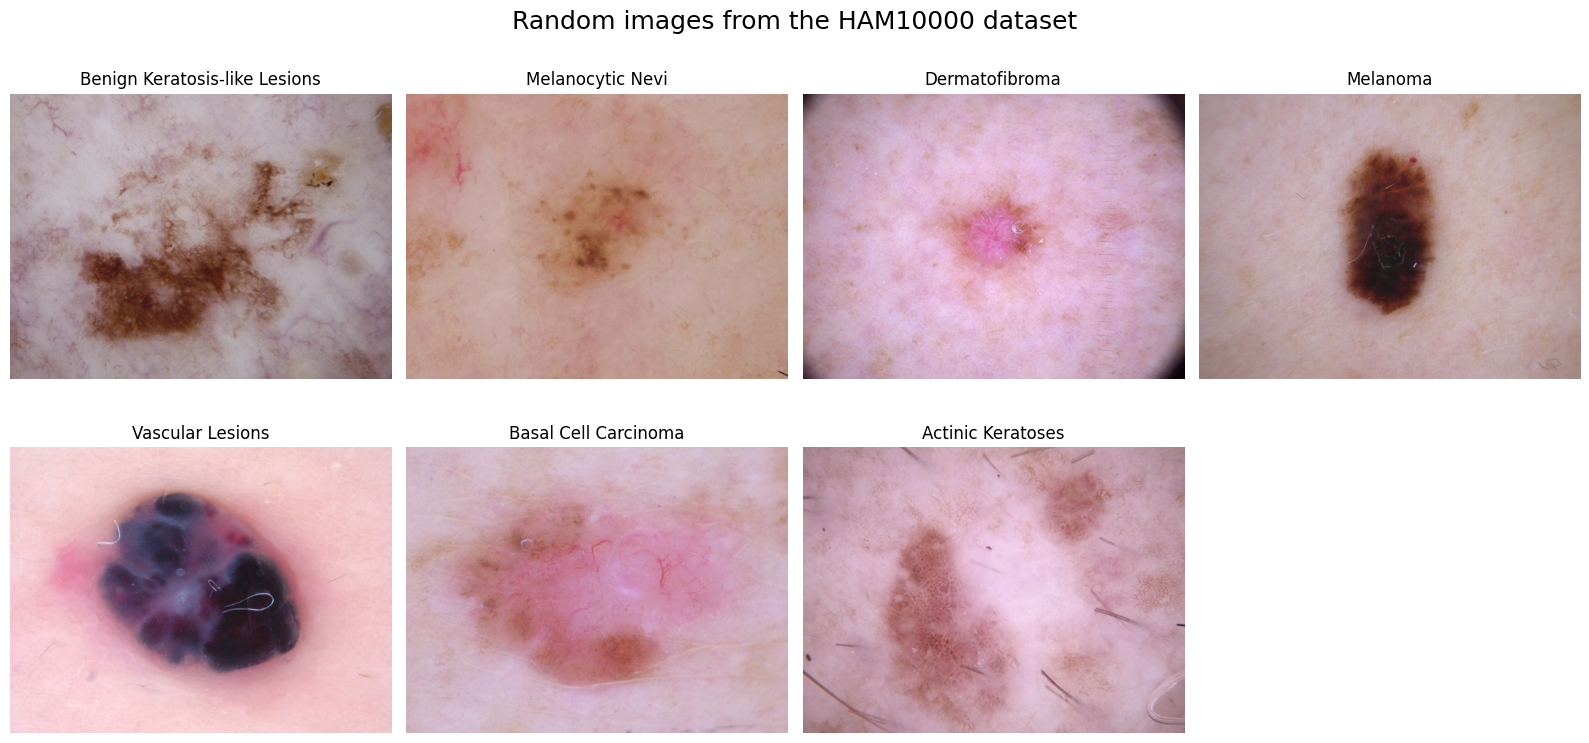

In [9]:
# pick 8 random images from img_folder
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
# import scienceplots

# set the style
# plt.style.use(['science', 'ieee'])

images = random.sample(os.listdir(img_folder), 8)
print(images)

meta = pd.read_csv("/home/sn666/explainable_ai/LaBo/datasets/HAM10000/images/HAM10000_metadata.csv")
meta

def get_label(img_name):
    label = meta[meta["image_id"] == img_name[:-4]]["dx"].values[0]
    # it's currently a b'byte' string, so decode it to a normal string
    return label

# get the labels for the images
# labels = [get_label(img) for img in images]

# select one from each class
# get the unique labels
unique_labels = meta["dx"].unique()
print(unique_labels)

# get a random image for each label
images = []
for label in unique_labels:
    # get the first image with the label
    img = random.choice(meta[meta["dx"] == label]["image_id"].values)
    images.append(img + ".jpg")

print(images)

plt.figure(figsize=(16, 8))

# melanocytic nevi, melanoma, benign keratosis-like lesions, and other: basal cell carcinoma, actinic keratoses, vascular lesions, and dermatofibroma
lb_map = {
    "nv": "Melanocytic Nevi",
    "mel": "Melanoma",
    "bkl": "Benign Keratosis-like Lesions",
    "bcc": "Basal Cell Carcinoma",
    "akiec": "Actinic Keratoses",
    "vasc": "Vascular Lesions",
    "df": "Dermatofibroma"
}

for i, (img, label) in enumerate(zip(images, labels)):
    img_path = os.path.join(img_folder, img)
    image = Image.open(img_path)
    
    plt.subplot(2, 4, i + 1)
    plt.imshow(image)
    # set subplot title to the image label
    plt.title(lb_map[get_label(img)])
    plt.axis('off')

plt.suptitle("Random images from the HAM10000 dataset", fontsize=18)
plt.tight_layout()
plt.show()


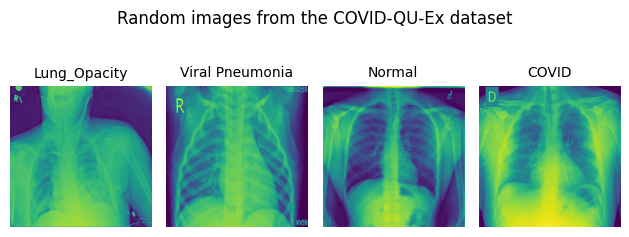

In [2]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# plot an image from each class in /home/sn666/explainable_ai/LaBo/datasets/COVIDX/images

img_folder = "/home/sn666/explainable_ai/LaBo/datasets/COVIDX/images"
classes = set([i.split("-")[0] for i in os.listdir(img_folder)])

for i, cls in enumerate(classes):
    img = random.choice([i for i in os.listdir(img_folder) if i.startswith(cls)])
    img_path = os.path.join(img_folder, img)
    image = Image.open(img_path)
    
    plt.subplot(2, 4, i + 1)
    plt.imshow(image)
    plt.title(cls, fontsize=10)
    plt.axis('off')
    
plt.suptitle("Random images from the COVID-QU-Ex dataset", fontsize=12)
plt.tight_layout()